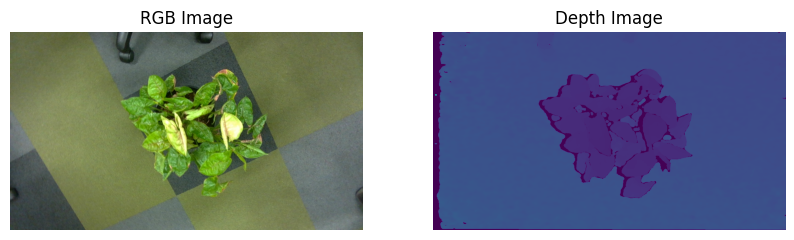

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the RGB image
rgb_image_path = './D405_plant_20240322150432/rgb_000001.png'
rgb_image = cv2.cvtColor(cv2.imread(rgb_image_path), cv2.COLOR_BGR2RGB)

# Load the depth image
depth_image_path = './D405_plant_20240322150432/depth_000001.png'
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_UNCHANGED)  # Read the depth image

# Display the images side by side
plt.figure(figsize=(10, 5))

# Display RGB image
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')

# Display Depth image
plt.subplot(1, 2, 2)
plt.imshow(depth_image)  # Use the default colormap
plt.title('Depth Image')
plt.axis('off')

plt.show()


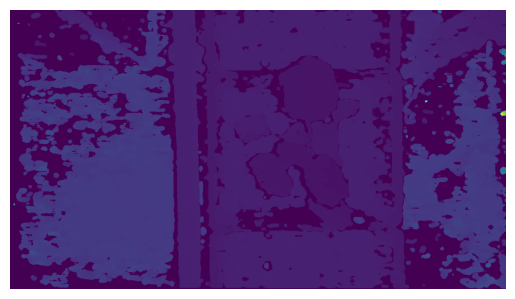

In [10]:
import cv2
import matplotlib.pyplot as plt

depth_image_path = './test_plant_20240502133102/test_plant_20240502133102/depth_1509.png'
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_UNCHANGED)  # Read the depth image

# Display the image using the 'viridis' colormap
plt.imshow(depth_image, cmap='viridis')
plt.axis('off')  # Hide the axis
plt.show()

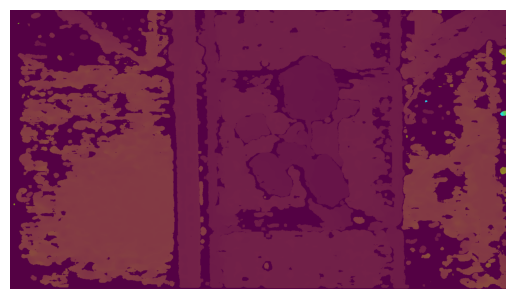

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the depth image
depth_image_path = './test_plant_20240502133102/test_plant_20240502133102/depth_1509.png'
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_UNCHANGED)

# Check if the image is loaded properly
if depth_image is None:
    print("Image not loaded. Please check the file path.")
else:
    # Normalize the depth image to 0-255
    depth_image_normalized = cv2.normalize(depth_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    # Apply a color map
    colored_image = cv2.applyColorMap(depth_image_normalized, cv2.COLORMAP_VIRIDIS)

    # Display the image
    plt.imshow(colored_image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()


In [3]:
image = mpimg.imread(image_path)

# Set the temperature range
norm = Normalize(vmin=-40, vmax=150)

# Create the plot
fig, ax = plt.subplots()
cax = ax.imshow(image, cmap='inferno', norm=norm)

# Add a colorbar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
cbar.set_label('Temperature (°C)')
# Save the modified image
output_path = './test_plant_20240502133102/test_plant_20240502133102/thermal_1509_inf.jpg'
plt.savefig(output_path)
plt.close()

output_path



'./test_plant_20240502133102/test_plant_20240502133102/thermal_1509_inf.jpg'

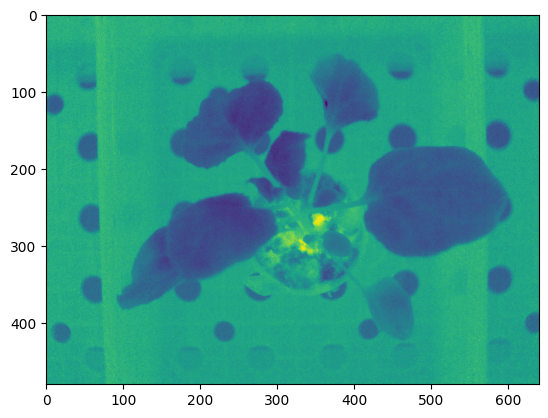

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
image_path = "./test_plant_20240502133102/test_plant_20240502133102/thermal_1509.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
# # Define the temperature range
# min_temp = -40
# max_temp = 150

# # # Normalize the temperature range to 0-1
# # normalized_img = (img - min_temp) / (max_temp - min_temp)
# # normalized_img = np.clip(normalized_img, 0, 1)

# # Apply inferno colormap
# colormap_img = plt.cm.inferno(normalized_img)[:, :, :3]

# # Define the color scale from 0 to 50 degrees Celsius
# color_scale_min = 0
# color_scale_max = 50

# # Scale the colormap to the desired temperature range
# scaled_colormap_img = (colormap_img * (color_scale_max - color_scale_min)) + color_scale_min

# # Display the resulting image
# plt.imshow(scaled_colormap_img)
# plt.axis('off')
# plt.show()


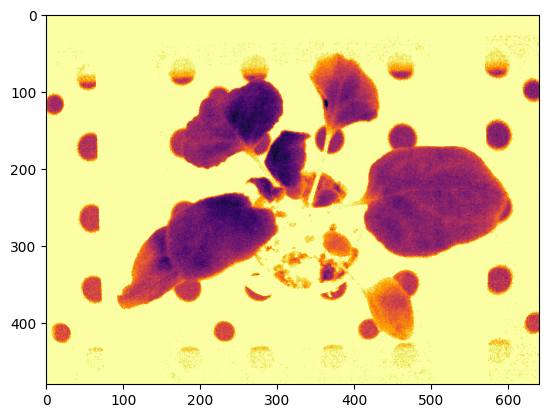

In [25]:
plt.imshow(img, cmap='inferno', vmin=50, vmax=150)

In [26]:
masks = np.load('./test_plant_20240502133102/test_plant_20240502133102/rgb_1509_mask.npy')


In [28]:
masks.shape

(14, 1, 720, 1280)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


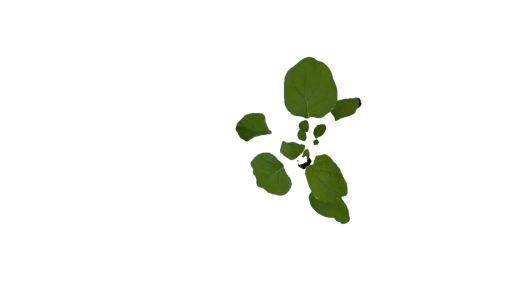

In [13]:
def load_image_and_masks(image_path, mask_path):
    # Load the RGB image
    plant_image = plt.imread(image_path)

    # Load the mask and squeeze the singleton dimension
    masks = np.load(mask_path)
    masks = np.squeeze(masks, axis=1)  # Adjust the axis if necessary

    return plant_image, masks

def display_masks(plant_image, masks):
    # Create a white background with the same dimensions as the plant image
    white_background = np.ones_like(plant_image) * 255  # Assuming the plant image is in uint8 [0, 255] range
    
    # Setup the plot
    fig, ax = plt.subplots()
    img = ax.imshow(white_background)
    ax.axis('off')  # Turn off axis labels
    
    for i in range(masks.shape[0]):
        # Apply the current mask to the white background
        for c in range(3):  # Apply mask to each channel (RGB)
            white_background[:, :, c] = np.where(masks[i], plant_image[:, :, c], white_background[:, :, c])

        # Update the image data
        img.set_data(white_background)
        display(fig)
        plt.pause(0.5)  # Pause for half a second between masks
        clear_output(wait=True)  # Clear the output after displaying the plot

    plt.close(fig)  # Close the plot after all masks are displayed

# Example usage
image_path = './test_plant_20240502133102/test_plant_20240502133102/rgb_1509.png'
mask_path = './test_plant_20240502133102/test_plant_20240502133102/rgb_1509_mask.npy'
plant_image, masks = load_image_and_masks(image_path, mask_path)
display_masks(plant_image, masks)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


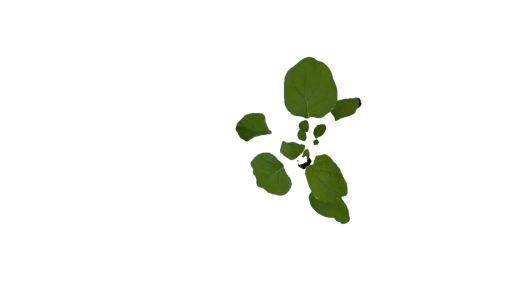

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def load_image_and_masks(image_path, mask_path):
    # Load the RGB image
    plant_image = plt.imread(image_path)

    # Load the mask and squeeze the singleton dimension
    masks = np.load(mask_path)
    masks = np.squeeze(masks, axis=1)  # Adjust the axis if necessary

    return plant_image, masks

def display_masks(plant_image, masks):
    # Create a white background with the same dimensions as the plant image
    white_background = np.ones_like(plant_image) * 255  # Assuming the plant image is in uint8 [0, 255] range
    
    # Setup the plot
    fig, ax = plt.subplots()
    img = ax.imshow(white_background)
    ax.axis('off')  # Turn off axis labels
    
    for i in range(masks.shape[0]):
        # Apply the current mask to the white background
        for c in range(3):  # Apply mask to each channel (RGB)
            white_background[:, :, c] = np.where(masks[i], plant_image[:, :, c], white_background[:, :, c])

        # Update the image data
        img.set_data(white_background)
        display(fig)
        plt.pause(0.5)  # Pause for half a second between masks
        
        # Save the current display to a file
        fig.savefig(f'./disp_{i}.png')  # Save the figure as a PNG file
        
        clear_output(wait=True)  # Clear the output after displaying the plot

    plt.close(fig)  # Close the plot after all masks are displayed

# Example usage
image_path = './test_plant_20240502133102/test_plant_20240502133102/rgb_1509.png'
mask_path = './test_plant_20240502133102/test_plant_20240502133102/rgb_1509_mask.npy'
plant_image, masks = load_image_and_masks(image_path, mask_path)
display_masks(plant_image, masks)


In [16]:
from PIL import Image
import os

In [18]:


def create_gif(image_folder, output_path, duration=500):
    # List all files in the folder sorted by name
    image_files = sorted((os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.png')), key=os.path.basename)
    print(image_files)
    # Load images
    images = [Image.open(file) for file in image_files]
    
    # Save the images as a gif
    images[0].save(output_path, save_all=True, append_images=images[1:], optimize=False, duration=duration, loop=0)

# Example usage
image_folder = './images_/'  # The folder where your images are stored
output_path = './images_/plant_leaves_animation.gif'  # Desired output path for the GIF
create_gif(image_folder, output_path)


['./images_/disp_0.png', './images_/disp_1.png', './images_/disp_10.png', './images_/disp_11.png', './images_/disp_12.png', './images_/disp_13.png', './images_/disp_2.png', './images_/disp_3.png', './images_/disp_4.png', './images_/disp_5.png', './images_/disp_6.png', './images_/disp_7.png', './images_/disp_8.png', './images_/disp_9.png']


In [19]:
def create_gif(image_folder, output_path, duration=500):
    # Helper function to extract the numerical part from the filename
    def sort_key(filename):
        # Extracts the number from the filename format 'disp_{i}.png'
        parts = os.path.basename(filename).split('_')
        number_part = parts[1].split('.')[0]
        return int(number_part)
    
    # List all files in the folder, sorted by numerical order
    image_files = sorted(
        (os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.png')),
        key=sort_key
    )
    
    # Load images
    images = [Image.open(file) for file in image_files]
    
    # Save the images as a gif
    images[0].save(output_path, save_all=True, append_images=images[1:], optimize=False, duration=duration, loop=0)

# Example usage
image_folder = './images_'  # Update this path to the folder where your images are stored
output_path = './images_/plant_leaves_animation.gif' # Desired output path for the GIF
create_gif(image_folder, output_path)

In [20]:
from PIL import Image
import os

def create_gif(image_folder, output_path, duration=500):
    # Helper function to extract the numerical part from the filename
    def sort_key(filename):
        # Extracts the number from the filename format 'disp_{i}.png'
        parts = os.path.basename(filename).split('_')
        number_part = parts[1].split('.')[0]
        return int(number_part)

    # List all files in the folder, sorted by numerical order
    image_files = sorted(
        (os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.png')),
        key=sort_key
    )
    
    # Load and crop images
    images = []
    for file in image_files:
        img = Image.open(file)
        width, height = img.size
        
        # Calculate crop dimensions (20% crop from each side)
        left = width * 0.2
        top = height * 0.2
        right = width * 0.8
        bottom = height * 0.8

        # Crop the image
        cropped_img = img.crop((left, top, right, bottom))
        images.append(cropped_img)
    
    # Save the images as a gif
    images[0].save(output_path, save_all=True, append_images=images[1:], optimize=False, duration=duration, loop=0)

# Example usage
image_folder = './images_'  # Update this path to the folder where your images are stored
output_path = './images_/plant_leaves_animation.gif'  # Desired output path for the GIF
create_gif(image_folder, output_path)
